### PART A
### DOMAIN: Automobile
- CONTEXT: The data concerns city-cycle fuel consumption in miles per gallon to be predicted in terms of 3 multivalued discrete and 5 continuous attributes.
###  DATA DESCRIPTION:
    cylinders: multi-valued discrete     acceleration: continuous
    displacement: continuous             model year: multi-valued discrete
    horsepower: continuous               origin: multi-valued discrete
    weight: continuous                   car name: string (unique for each instance)
    mpg: continuous
### PROJECT OBJECTIVE :
- To understand K-means Clustering by applying on the Car Dataset to segment the cars into various categories.

In [248]:
# Numerical libraries
import numpy as np   

from sklearn.model_selection import train_test_split

from sklearn.cluster import KMeans

# to handle data in form of rows and columns 
import pandas as pd    

# importing ploting libraries
import matplotlib.pyplot as plt   

#importing seaborn for statistical plots
import seaborn as sns

from sklearn import metrics

import pandas as pd

import warnings
warnings.simplefilter('ignore')

### Q1: Data Understanding & Exploration

#### Q1A: Read ‘Car name.csv’ as a DataFrame and assign it to a variable.

In [249]:
df1 = pd.read_csv('Car-name.csv')
df1.head()

,car_name
0,chevrolet chevelle malibu
1,buick skylark 320
2,plymouth satellite
3,amc rebel sst
4,ford torino


#### Q1B: Read ‘Car-Attributes.json as a DataFrame and assign it to a variable.

In [250]:
df2 = pd.read_json('Car-Attributes.json')
df2.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


#### Q1C: Merge both the DataFrames together to form a single DataFrame

In [251]:
df =  pd.concat([df1, df2], axis=1, join='inner')
df.head()

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
1,buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
2,plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
3,amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
4,ford torino,17.0,8,302.0,140,3449,10.5,70,1


In [252]:
df.shape

(398, 9)

In [253]:
df1.shape

(398, 1)

In [254]:
df2.shape

(398, 8)

In [255]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   car_name  398 non-null    object 
 1   mpg       398 non-null    float64
 2   cyl       398 non-null    int64  
 3   disp      398 non-null    float64
 4   hp        398 non-null    object 
 5   wt        398 non-null    int64  
 6   acc       398 non-null    float64
 7   yr        398 non-null    int64  
 8   origin    398 non-null    int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


#### Q1D: Print 5 point summary of the numerical features and share insights.

In [256]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cyl,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
disp,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
wt,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acc,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
yr,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
origin,398.0,1.572864,0.802055,1.0,1.000,1.0,2.000,3.0


#### 
- There are no missing values in the dataset.
- Displacement is right skewed.
- This dataset is collected for all the vehcicles between 1970-1982 duration.
- All the vechicles in the dataset has minimum mpg:9, 3 cylinders and 68 displacement.

### Q2:  Data Preparation & Analysis

####  Q2A Check and print feature-wise percentage of missing values present in the data and impute with the best suitable approach.

In [257]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   car_name  398 non-null    object 
 1   mpg       398 non-null    float64
 2   cyl       398 non-null    int64  
 3   disp      398 non-null    float64
 4   hp        398 non-null    object 
 5   wt        398 non-null    int64  
 6   acc       398 non-null    float64
 7   yr        398 non-null    int64  
 8   origin    398 non-null    int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [258]:
#hp feature(horsepower) is shown as object type rather than being a float type. Lets convert. 
#df['hp'] = df['hp'].astype('float64')

In [259]:
#Check for any missing values.
df.isna().sum()

car_name    0
mpg         0
cyl         0
disp        0
hp          0
wt          0
acc         0
yr          0
origin      0
dtype: int64

In [297]:
# Print the % of missing values.
print((df.isna().sum()/len(df))*100)

mpg       0.0
cyl       0.0
disp      0.0
hp        0.0
wt        0.0
acc       0.0
yr        0.0
origin    0.0
GROUP     0.0
dtype: float64


- There doesnt seem to be any missing values in the dataset. All the features has 0% missing values.

#### Q2B: Check for duplicate values in the data and impute with the best suitable approach.

In [261]:
#find duplicate rows across all columns
duplicateRows = df[df.duplicated()]

In [262]:
print(duplicateRows)

Empty DataFrame
Columns: [car_name, mpg, cyl, disp, hp, wt, acc, yr, origin]
Index: []


- There doesnt seem to be any duplicate values.

#### Q2H:Check for unexpected values in all the features and datapoints with such values

In [263]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   car_name  398 non-null    object 
 1   mpg       398 non-null    float64
 2   cyl       398 non-null    int64  
 3   disp      398 non-null    float64
 4   hp        398 non-null    object 
 5   wt        398 non-null    int64  
 6   acc       398 non-null    float64
 7   yr        398 non-null    int64  
 8   origin    398 non-null    int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


- hp(hosrepower) feature is shown as object instead of float. Let's look at the unique elements of horsepower to look for discrepancies.

In [264]:
df.hp.unique()

array([130, 165, 150, 140, 198, 220, 215, 225, 190, 170, 160, 95, 97, 85,
       88, 46, 87, 90, 113, 200, 210, 193, '?', 100, 105, 175, 153, 180,
       110, 72, 86, 70, 76, 65, 69, 60, 80, 54, 208, 155, 112, 92, 145,
       137, 158, 167, 94, 107, 230, 49, 75, 91, 122, 67, 83, 78, 52, 61,
       93, 148, 129, 96, 71, 98, 115, 53, 81, 79, 120, 152, 102, 108, 68,
       58, 149, 89, 63, 48, 66, 139, 103, 125, 133, 138, 135, 142, 77, 62,
       132, 84, 64, 74, 116, 82], dtype=object)

- From the above, we can see hp contains unexpected value '?' among the other values. 
- Lets drop '?' values of hp.

In [265]:
# Replace missing values with NaN for hp feature.
df['hp'].replace('?', np.NaN, inplace=True)

In [266]:
df.hp.unique()

array([130., 165., 150., 140., 198., 220., 215., 225., 190., 170., 160.,
        95.,  97.,  85.,  88.,  46.,  87.,  90., 113., 200., 210., 193.,
        nan, 100., 105., 175., 153., 180., 110.,  72.,  86.,  70.,  76.,
        65.,  69.,  60.,  80.,  54., 208., 155., 112.,  92., 145., 137.,
       158., 167.,  94., 107., 230.,  49.,  75.,  91., 122.,  67.,  83.,
        78.,  52.,  61.,  93., 148., 129.,  96.,  71.,  98., 115.,  53.,
        81.,  79., 120., 152., 102., 108.,  68.,  58., 149.,  89.,  63.,
        48.,  66., 139., 103., 125., 133., 138., 135., 142.,  77.,  62.,
       132.,  84.,  64.,  74., 116.,  82.])

In [267]:
df.head()

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,1
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,1
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,1
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,1
4,ford torino,17.0,8,302.0,140.0,3449,10.5,70,1


In [268]:
#Remove all the rows with NaN values within hp feature.
df = df[df['hp'].notna()]

In [269]:
df['hp'] = df['hp'].astype(int)

In [270]:
df.hp.unique()

array([130, 165, 150, 140, 198, 220, 215, 225, 190, 170, 160,  95,  97,
        85,  88,  46,  87,  90, 113, 200, 210, 193, 100, 105, 175, 153,
       180, 110,  72,  86,  70,  76,  65,  69,  60,  80,  54, 208, 155,
       112,  92, 145, 137, 158, 167,  94, 107, 230,  49,  75,  91, 122,
        67,  83,  78,  52,  61,  93, 148, 129,  96,  71,  98, 115,  53,
        81,  79, 120, 152, 102, 108,  68,  58, 149,  89,  63,  48,  66,
       139, 103, 125, 133, 138, 135, 142,  77,  62, 132,  84,  64,  74,
       116,  82])

In [271]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   car_name  392 non-null    object 
 1   mpg       392 non-null    float64
 2   cyl       392 non-null    int64  
 3   disp      392 non-null    float64
 4   hp        392 non-null    int32  
 5   wt        392 non-null    int64  
 6   acc       392 non-null    float64
 7   yr        392 non-null    int64  
 8   origin    392 non-null    int64  
dtypes: float64(3), int32(1), int64(4), object(1)
memory usage: 29.1+ KB


In [272]:
#find duplicate rows across all columns
duplicateRows = df[df.duplicated()]

In [273]:
print(duplicateRows)

Empty DataFrame
Columns: [car_name, mpg, cyl, disp, hp, wt, acc, yr, origin]
Index: []


#### Q2C: Plot a pairplot for all features

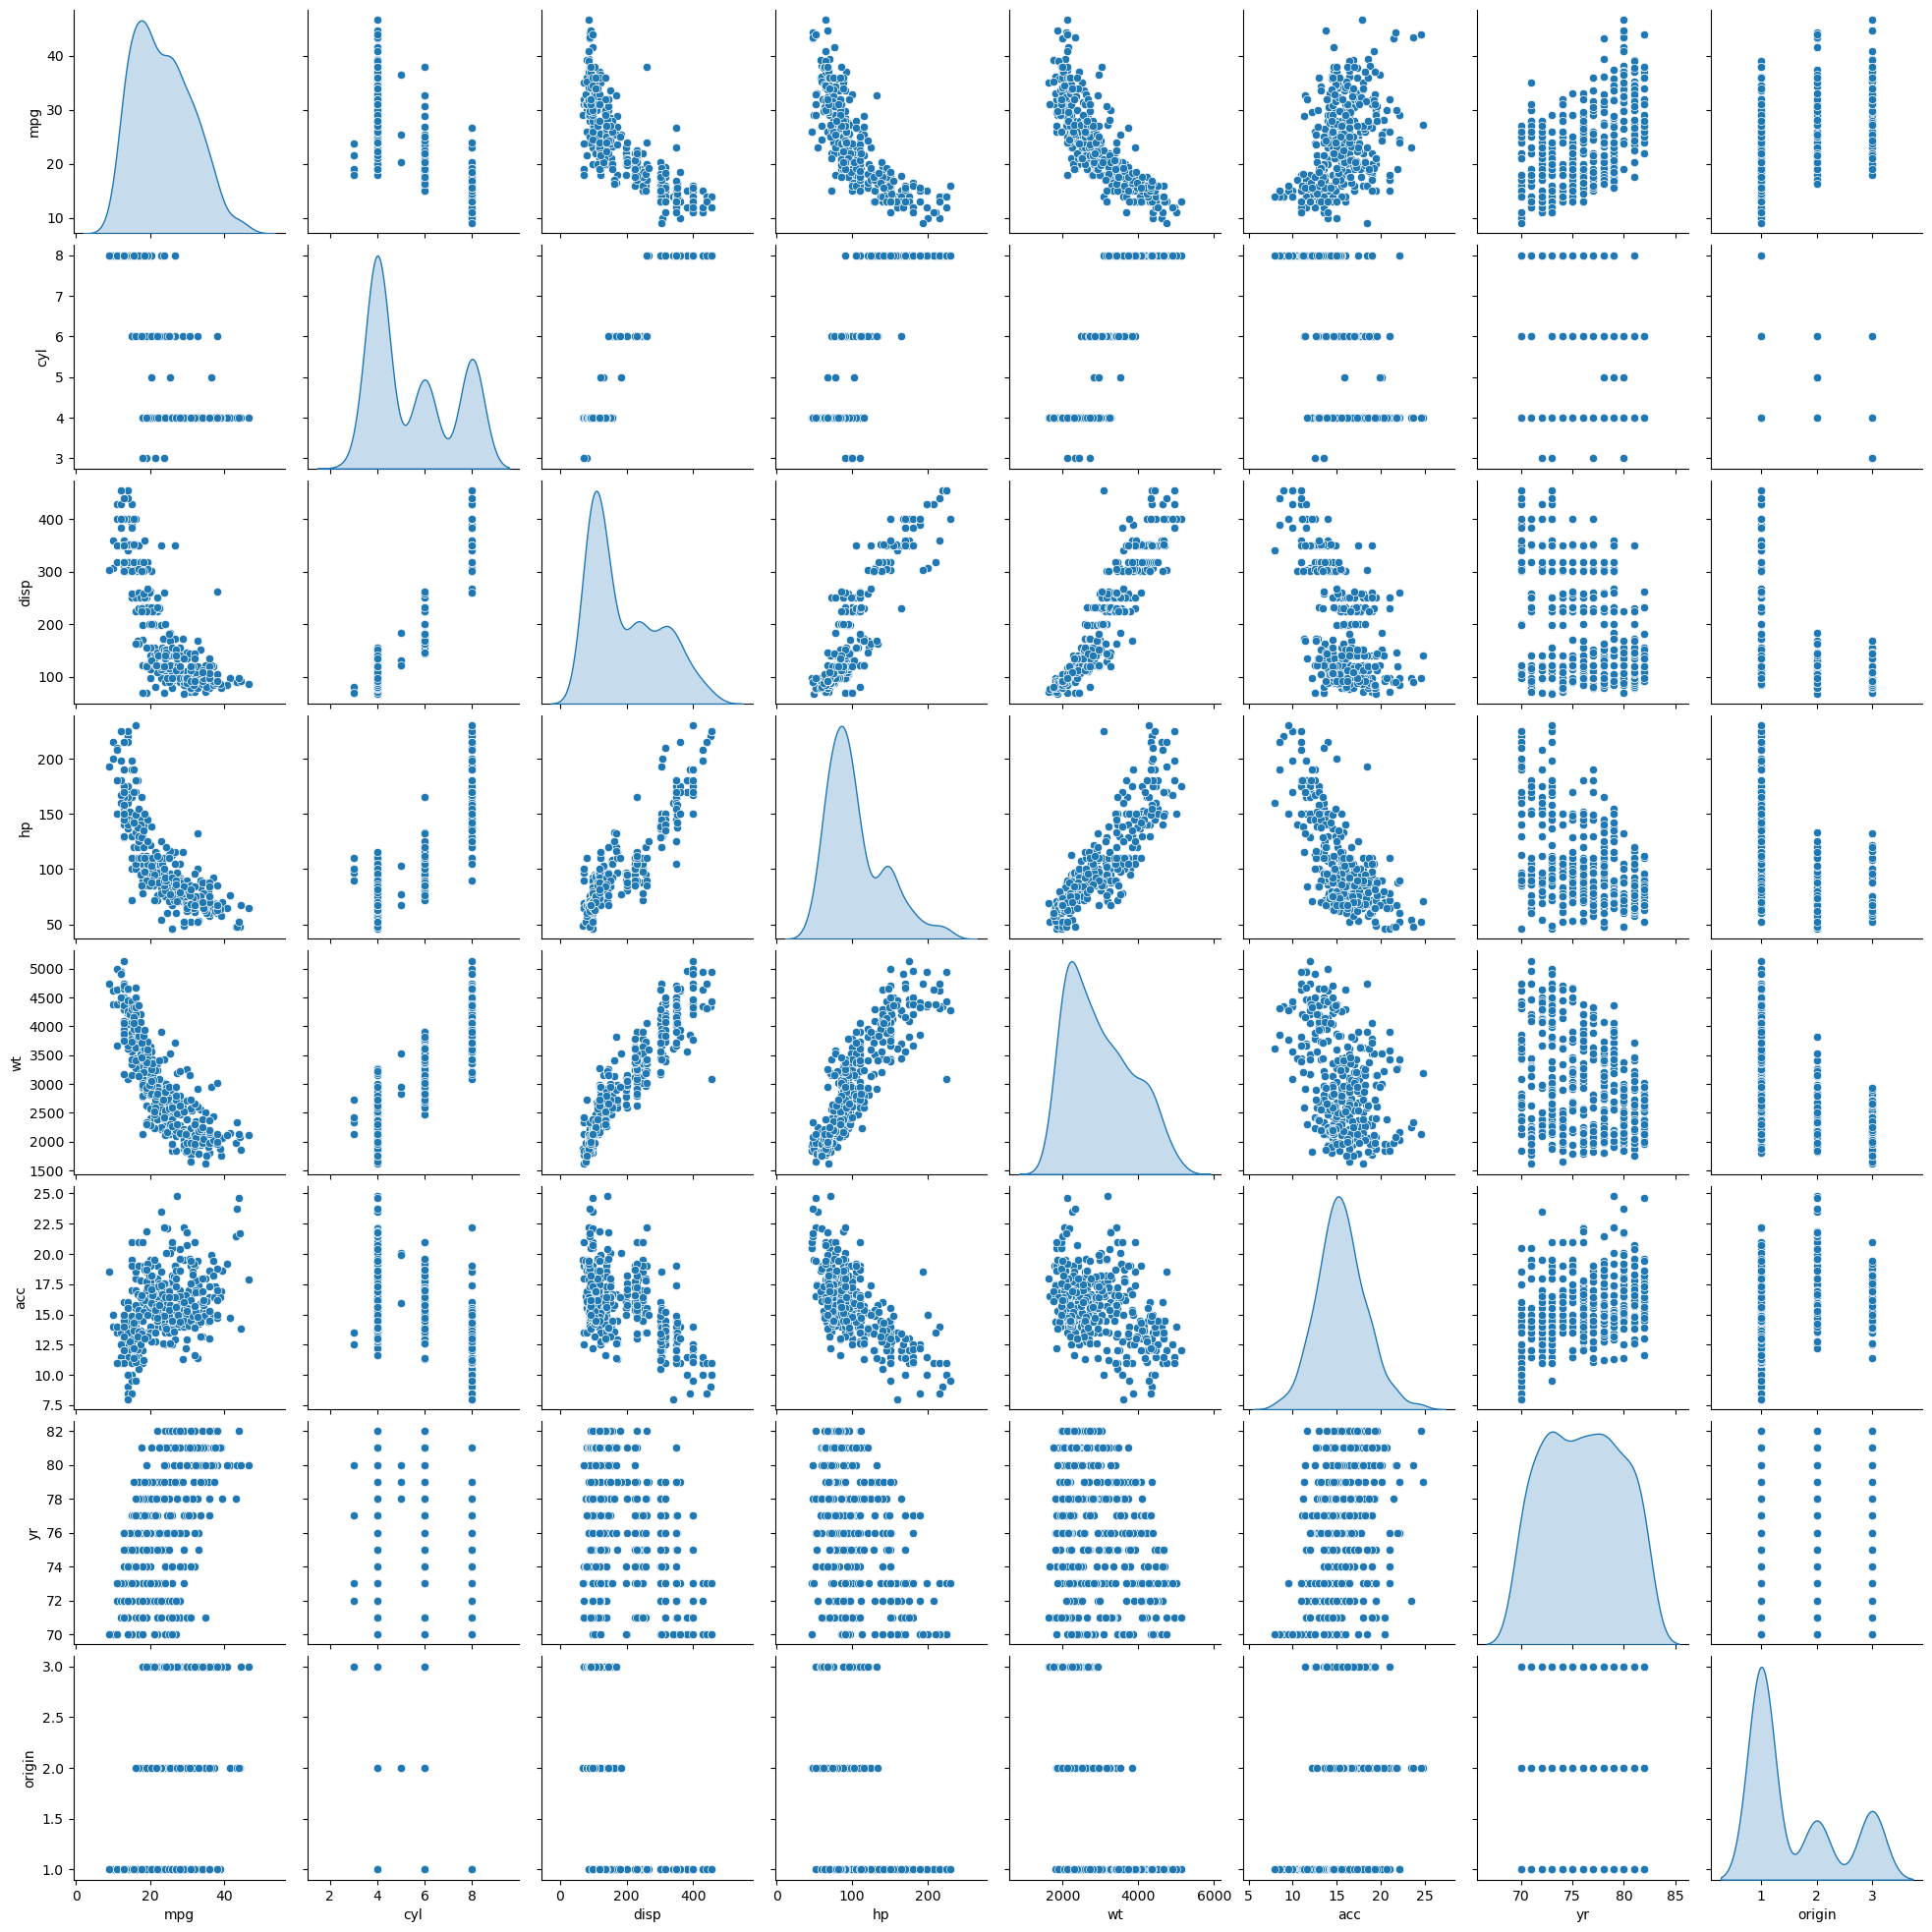

In [274]:
sns.pairplot(data=df, diag_kind="kde")
plt.show();

#### Q2D: Visualize a scatterplot for ‘wt’ and ‘disp’. Datapoints should be distinguishable by ‘cyl’.

In [275]:
#check the 'cyl' unique records.
df['cyl'].value_counts()

4    199
8    103
6     83
3      4
5      3
Name: cyl, dtype: int64

- 'cyl' feature has 5 unique records with 4,8,6,3,5 cylinders supported vehicle categories.

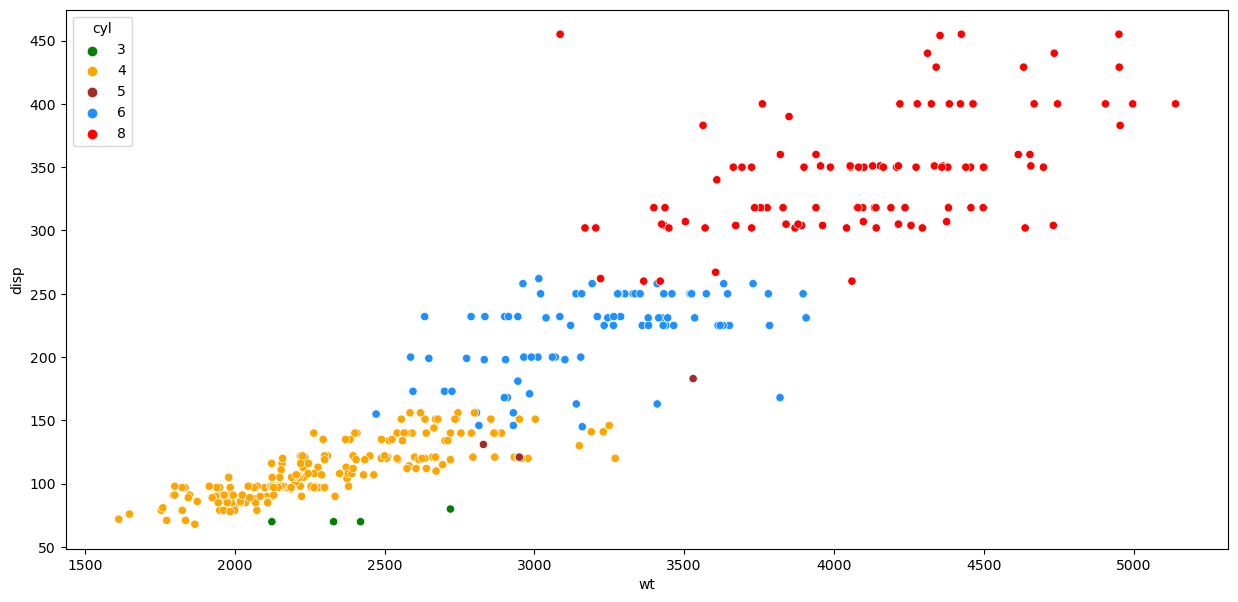

In [276]:
plt.figure(figsize=(15,7))
sns.scatterplot(data=df, x='wt', y ='disp', hue='cyl', palette=['green','orange','brown','dodgerblue','red'], legend='full')
plt.show()

#### Q2E: Share insights for Q2.D:
- Overall weight seems to have positive correlation with displacement such that as weight of the vehcile increases, displacement also increases.
- Cars with 8 cyclinders seems to have higher weight and displacement.
- Cars with 4 cyclinders have least weight. Overall 4 cylinder vehicles are higher in number compared to rest.
- Cars with 3 and 5 cyclinders are very few in number.

#### Q2F: Visualize a scatterplot for ‘wt’ and ’mpg’. Datapoints should be distinguishable by ‘cyl’.

<function matplotlib.pyplot.show(close=None, block=None)>

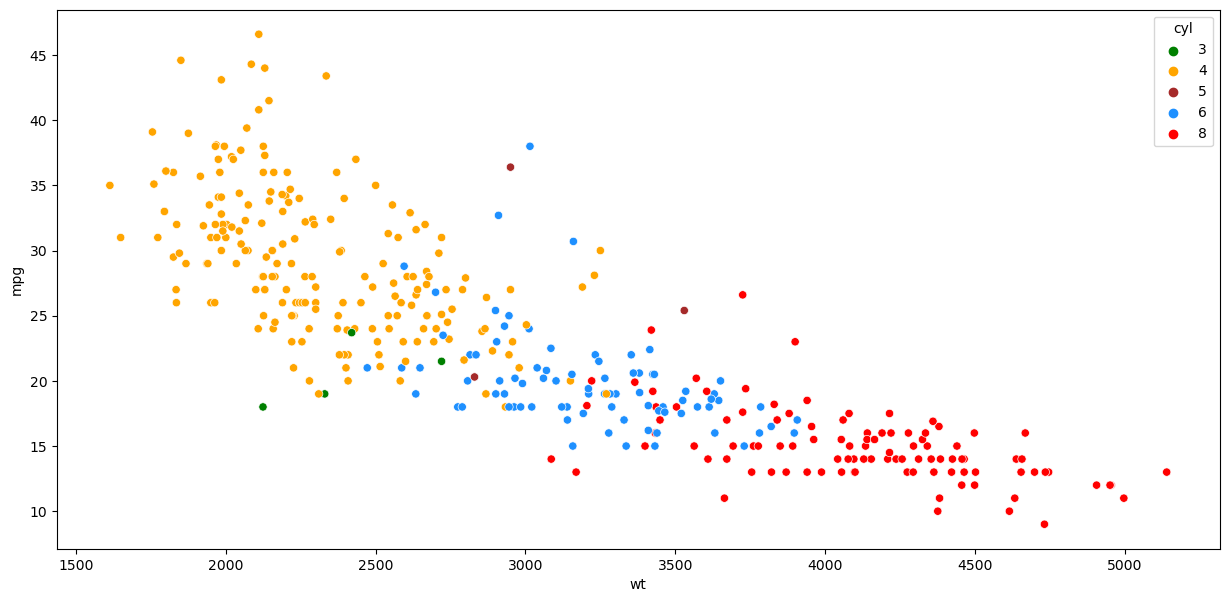

In [277]:
plt.figure(figsize=(15,7))
sns.scatterplot(data=df, x='wt', y ='mpg', hue='cyl', palette=['green','orange','brown','dodgerblue','red'], legend='full')
plt.show

#### Q2G: Share insights for Q2F:
- Overall weight seems to have strong negative correlation with mpg such that as weight of the vehcile increases, mpg decreases.
- Cars with 8 cyclinders seems to have higher weight and lower mpg.
- Cars with 4 cyclinders have least weight but highest mpg. Overall 4 cylinder vehicles are higher in number compared to rest.
- Cars with 3 and 5 cyclinders are very few in number.

### Q3: Clustering

#### Q3A: Apply K-Means clustering for 2 to 10 clusters.

In [278]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   car_name  392 non-null    object 
 1   mpg       392 non-null    float64
 2   cyl       392 non-null    int64  
 3   disp      392 non-null    float64
 4   hp        392 non-null    int32  
 5   wt        392 non-null    int64  
 6   acc       392 non-null    float64
 7   yr        392 non-null    int64  
 8   origin    392 non-null    int64  
dtypes: float64(3), int32(1), int64(4), object(1)
memory usage: 29.1+ KB


In [279]:
#dropping/ignoring car_name 
df = df.drop('car_name', axis=1)

Dropped the Car Name as it doesnt seem have any significance.

In [280]:
df.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


In [281]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     392 non-null    float64
 1   cyl     392 non-null    int64  
 2   disp    392 non-null    float64
 3   hp      392 non-null    int32  
 4   wt      392 non-null    int64  
 5   acc     392 non-null    float64
 6   yr      392 non-null    int64  
 7   origin  392 non-null    int64  
dtypes: float64(3), int32(1), int64(4)
memory usage: 26.0 KB


In [282]:
from sklearn.cluster import KMeans

from scipy.stats import zscore

In [283]:
#scaling the features
df_scaled = df.apply(zscore)
df_scaled.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin
0,-0.698638,1.483947,1.077290,0.664133,0.620540,-1.285258,-1.625315,-0.716641
1,-1.083498,1.483947,1.488732,1.574594,0.843334,-1.466724,-1.625315,-0.716641
2,-0.698638,1.483947,1.182542,1.184397,0.540382,-1.648189,-1.625315,-0.716641
3,-0.955212,1.483947,1.048584,1.184397,0.536845,-1.285258,-1.625315,-0.716641
4,-0.826925,1.483947,1.029447,0.924265,0.555706,-1.829655,-1.625315,-0.716641


In [284]:
my_data_z = df_scaled

In [285]:
#Apply k means clustering for 2-10 clusters
from scipy.spatial.distance import cdist
clusters=range(2,10)

#calculating the within sum of squares(WSS).
wss =[] 
for i in range(2,10):
    model = KMeans(n_clusters=i)
    model.fit(my_data_z)
    wss.append(model.inertia_)
wss

[1557.7707588149383,
 1170.3077985494647,
 968.1694074626055,
 815.2102262928399,
 739.0148962507046,
 669.310787256665,
 625.5318605482556,
 579.8678039073584]

#### Q3B: Plot a visual and find elbow point.

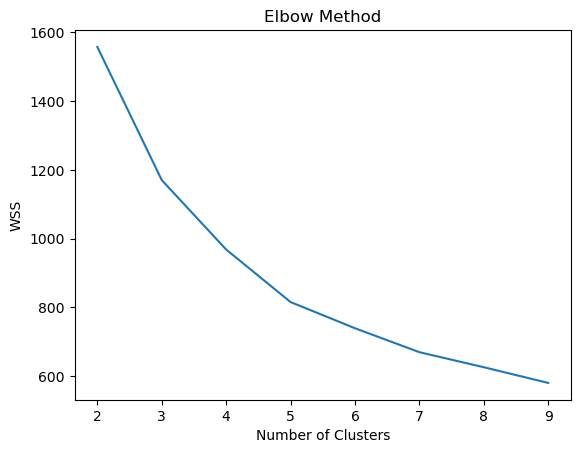

In [286]:
#plotting the WSS against the number of cluster to come up with optimal number of clusters using Elbow-method
plt.plot(range(2, 10), wss);
plt.title('Elbow Method');
plt.xlabel("Number of Clusters")
plt.ylabel("WSS");


#### Q3C: In the above visual, highlight which are the possible Elbow points.
##### From the above visual showing the elbow curve, it seems Cluster 5  looks to be optimal. Lets train with 5 clusters .

#### Q3D: Train a K-means clustering model once again on the optimal number of clusters. 

In [287]:
# Let us train with K = 5 which we found from elbow curve.
final_model=KMeans(5)
final_model.fit(my_data_z)
prediction=final_model.predict(my_data_z)

#### Q3E: Add a new feature in the DataFrame which will have labels based upon cluster value.

In [288]:
#Append the cluster predictions to original dataframe and scaled data frame.
df["GROUP"] = prediction
#my_data_z["GROUP"] = prediction
print("Groups Assigned : \n")
df.head()

Groups Assigned : 



,mpg,cyl,disp,hp,wt,acc,yr,origin,GROUP
0,18.0,8,307.0,130,3504,12.0,70,1,1
1,15.0,8,350.0,165,3693,11.5,70,1,1
2,18.0,8,318.0,150,3436,11.0,70,1,1
3,16.0,8,304.0,150,3433,12.0,70,1,1
4,17.0,8,302.0,140,3449,10.5,70,1,1


In [289]:
df['GROUP'].value_counts()

1    94
2    83
4    80
0    70
3    65
Name: GROUP, dtype: int64

- As can be seen above, we have all the datapoints grouped into 5 clusters.

#### Q3F: Plot a visual and color the datapoints based upon clusters

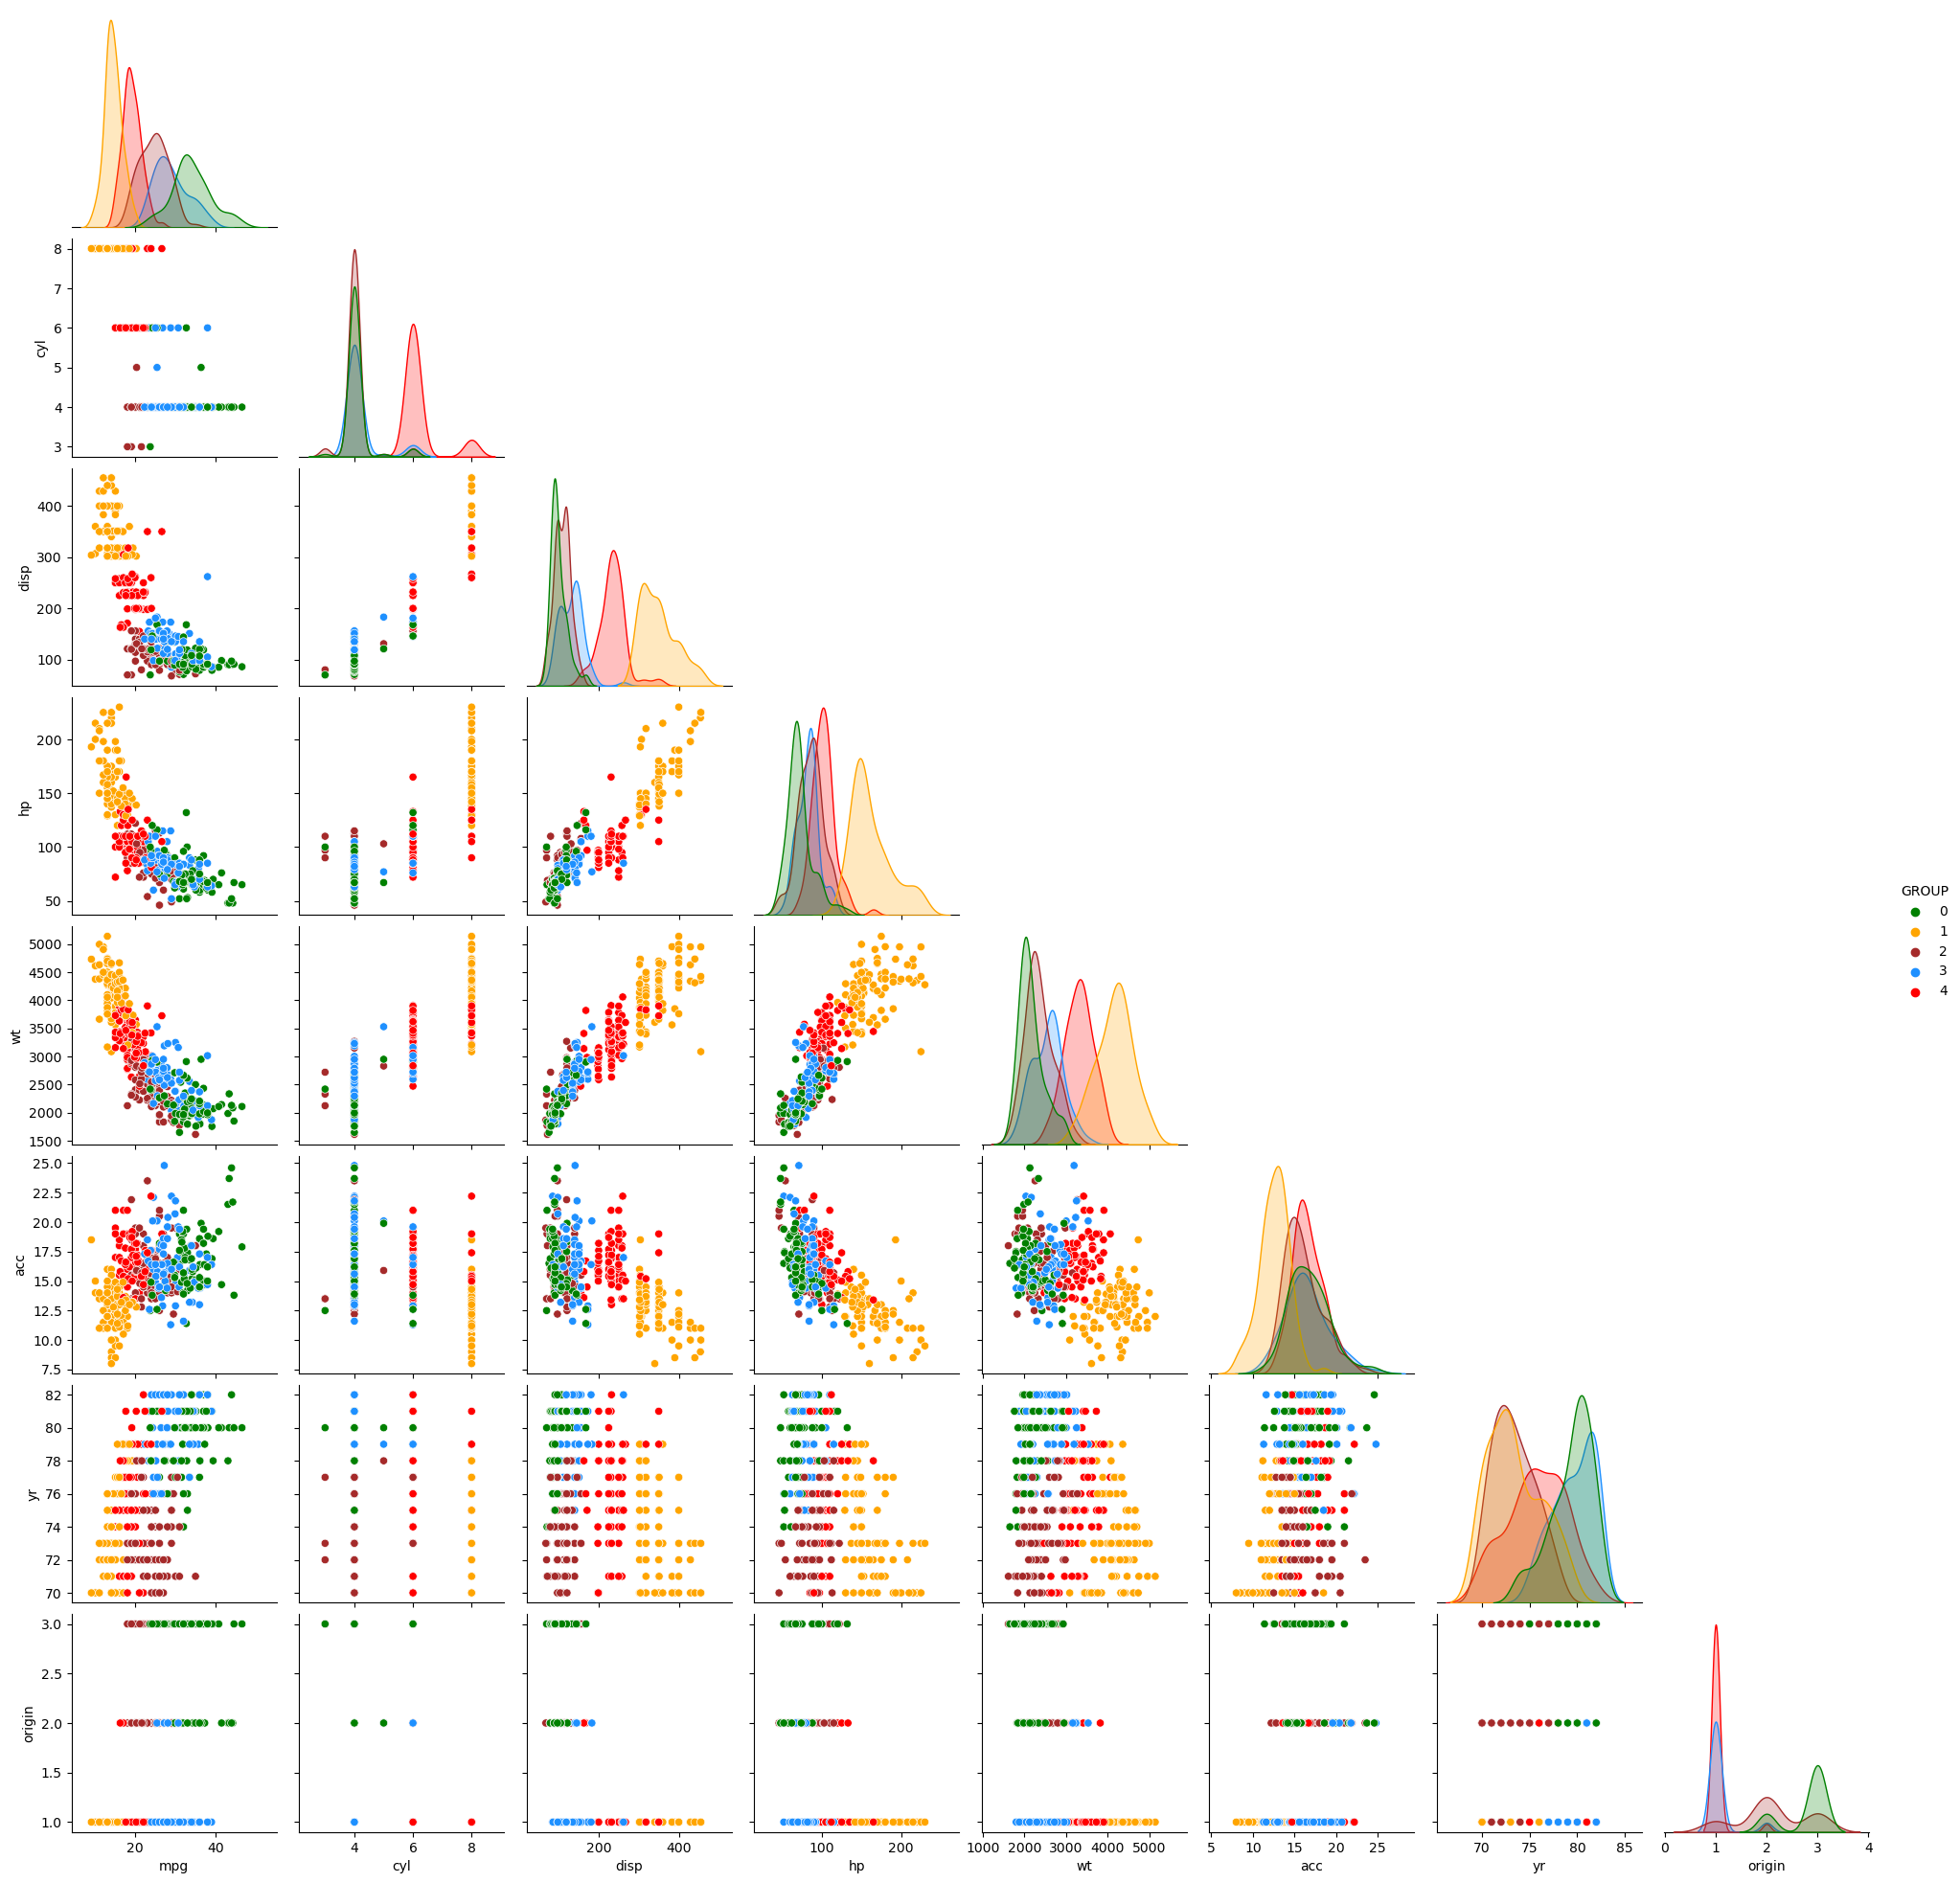

In [290]:
sns.pairplot(df, diag_kind='kde', corner = True, hue = 'GROUP', palette=['green','orange','brown','dodgerblue','red']);

<Axes: xlabel='GROUP', ylabel='acc'>

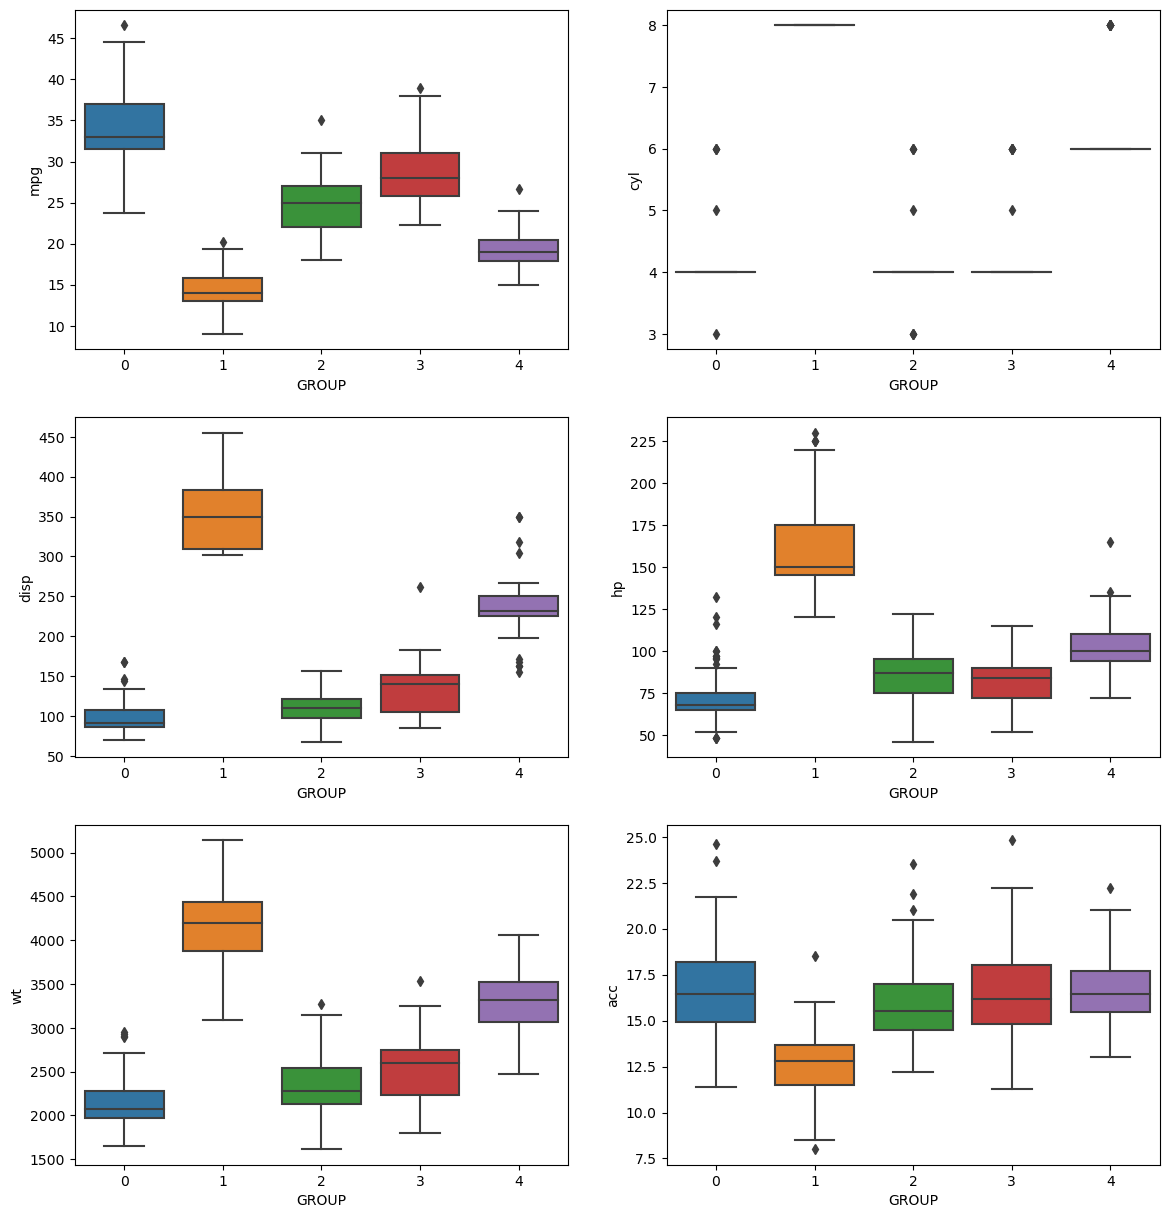

In [291]:
f, axes = plt.subplots(3, 2, figsize=(14, 15))
sns.boxplot(x='GROUP', y='mpg', data=df, ax=axes[0][0])
sns.boxplot(x='GROUP', y='cyl', data=df, ax=axes[0][1])
sns.boxplot(x='GROUP', y='disp', data=df, ax=axes[1][0])
sns.boxplot(x='GROUP', y='hp', data=df, ax=axes[1][1])
sns.boxplot(x='GROUP', y='wt', data=df, ax=axes[2][0])
sns.boxplot(x='GROUP', y='acc', data=df, ax=axes[2][1])


#### Q3G: Pass a new DataPoint and predict which cluster it belongs to:

In [296]:
# New data point to predict its cluster
# mpg=25.0,cyl=5, disp=170, hp=100, wt=3000, acc=16.0, yr=80, origin=2
new_data_point = np.array([[25.0, 5, 170, 100, 3000, 16.0, 80, 2]])

# Predict the cluster for the new data point
predicted_cluster = final_model.predict(new_data_point)

print("New data point belongs to cluster:", predicted_cluster)

New data point belongs to cluster: [1]


#### New data point  is predicted to be part of Cluster 1.

### *********************** END OF PART A *****************************